In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.linear_model import  Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Prepare Data

## import

In [2]:
df = pd.read_csv('/content/boston.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Explore

In [3]:
'''- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's'''

"- CRIM per capita crime rate by town\n- ZN proportion of residential land zoned for lots over 25,000 sq.ft.\n- INDUS proportion of non-retail business acres per town\n- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n- NOX nitric oxides concentration (parts per 10 million)\n- RM average number of rooms per dwelling\n- AGE proportion of owner-occupied units built prior to 1940\n- DIS weighted distances to five Boston employment centres\n- RAD index of accessibility to radial highways\n- TAX full-value property-tax rate per $10,000\n- PTRATIO pupil-teacher ratio by town\n- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n- LSTAT % lower status of the population\n- MEDV Median value of owner-occupied homes in $1000's"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Remove the least corr with our target
corr = df.corr()
corr['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [6]:
df.drop(columns=['CHAS','DIS'],inplace=True)

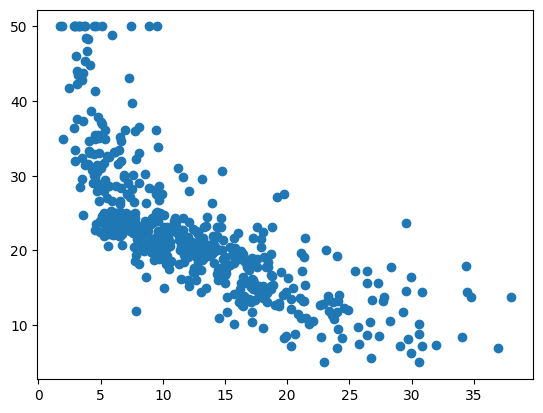

In [7]:
# Lets plot the biggest two highst corr with our target
plt.scatter('LSTAT','MEDV',data=df)


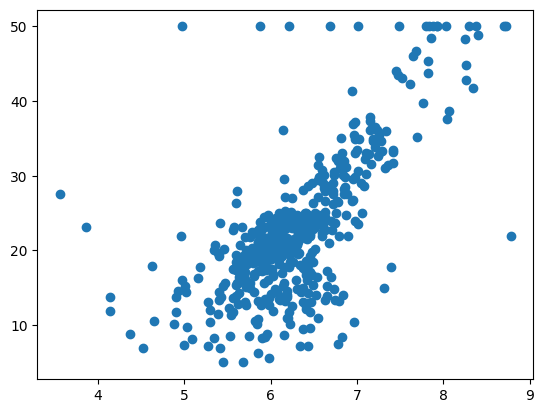

In [8]:
plt.scatter('RM','MEDV',data=df)

## Split

In [9]:
target = 'MEDV'
X = df.drop(columns=target)
y = df[target]

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 11)
(404,)
(102, 11)
(102,)


# Build Model

## Baseline

In [11]:
y_mean = y.mean()
y_pred = [y_mean] * len(y_test)
y_base_err = mean_absolute_error(y_test,y_pred)
print(f'base model = {y_mean}')
print(f'Mean absoulte Error = {y_base_err}')

base model = 22.532806324110677
Mean absoulte Error = 6.179593892893126


## Iterate

In [12]:
model = Ridge()
model.fit(X_train,y_train)

Ridge()

## Evalute

In [24]:
# predict with training data
y_pred_training=model.predict(X_train)
mean_absolute_error(y_train,y_pred_training)

3.461328343120118

In [22]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.3036797016808706

In [14]:
# our model preform better than baseline model now its time to Communicate Results

# Communicate Results

Text(0.5, 1.0, 'Feature Importances for MEDV')

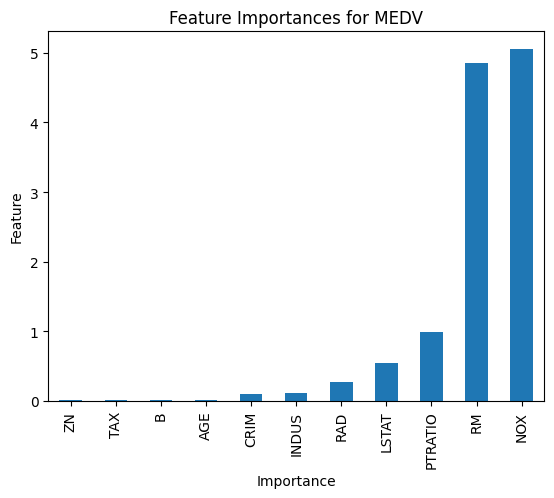

In [15]:
coefficients =  model.coef_
features = X_test.columns
feat_imp = pd.Series(coefficients,index=features).abs().sort_values(ascending=True)
feat_imp

# Build bar chart
feat_imp.plot(kind='bar')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for MEDV")

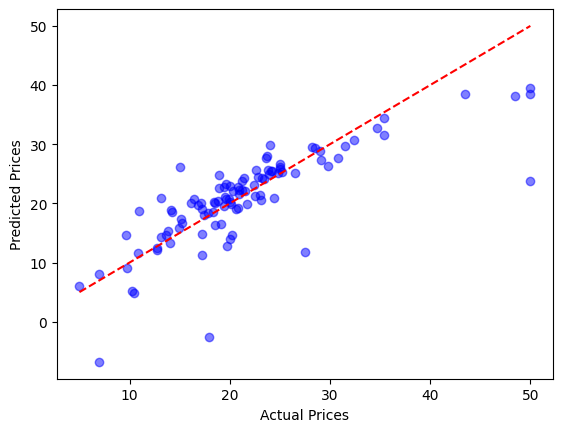

In [32]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices');